# Data Loading and Visualization 

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics
import pandas as pd  
import seaborn as sns 
from scipy import stats

%matplotlib inline


Source - http://lib.stat.cmu.edu/datasets/boston


---


Variables in order:


```
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
```

In [ ]:
from keras.datasets import boston_housing
(all_data, all_targets), (dummy_test_data, dummy_test_targets) = boston_housing.load_data(path="boston_housing.npz", test_split=0)
# keras load_data returns "Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test)"
# For data analysis and visualization purpose, it needs to be converted as dataframe
# So the data is loaded without splitting

In [1]:
column_names  = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
# Source - http://lib.stat.cmu.edu/datasets/boston

In [2]:
boston = pd.DataFrame(all_data, columns = column_names)
boston.head()

NameError: name 'pd' is not defined

In [ ]:
print(boston[boston.CHAS==0])

In [ ]:
boston['House_price'] = all_targets
boston.sort_values('House_price',ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price
349,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
503,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
345,1.46336,0.0,19.58,0.0,0.605,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
344,1.51902,0.0,19.58,1.0,0.605,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
16,6.53876,0.0,18.10,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
68,9.91655,0.0,18.10,0.0,0.693,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97,6.3
473,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
248,38.35180,0.0,18.10,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0


Bivariate plots of data where MEDV != 50


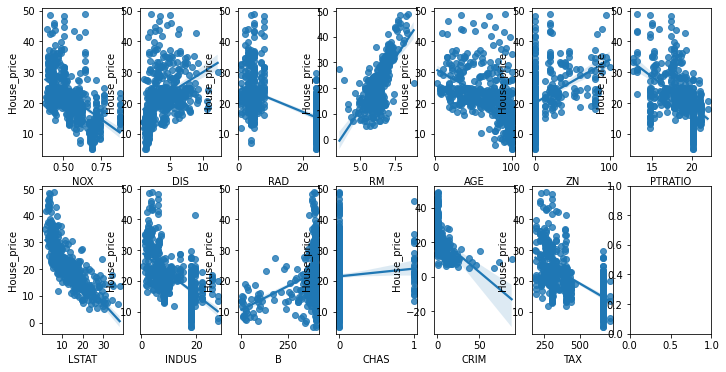

In [ ]:
print("Bivariate plots of data where MEDV != 50")
feature_cols = set(boston.columns) - set(['House_price'])
boston1 = boston[boston['House_price'] != 50]
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(12, 6))
for i, feature in enumerate(feature_cols):
    sns.regplot(x=feature, y='House_price', data=boston1, ax=axs[int(i/7), i%7])

Bivariate plots of data where MEDV == 50


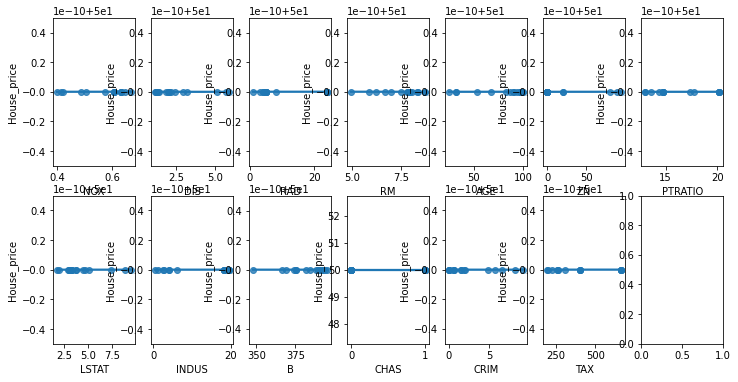

In [ ]:
print("Bivariate plots of data where MEDV == 50")
boston1 = boston[boston['House_price'] == 50]
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(12, 6))
for i, feature in enumerate(feature_cols):
    sns.regplot(x=feature, y='House_price', data=boston1, ax=axs[int(i/7), i%7])

In [ ]:
boston=boston[boston.House_price!=50]

In [ ]:
boston.sort_values('House_price',ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price
191,0.52014,20.0,3.97,0.0,0.6470,8.398,91.5,2.2885,5.0,264.0,13.0,386.86,5.91,48.8
87,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81,48.5
233,0.33147,0.0,6.20,0.0,0.5070,8.247,70.4,3.6519,8.0,307.0,17.4,378.95,3.95,48.3
447,0.29819,0.0,6.20,0.0,0.5040,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92,46.7
100,0.06129,20.0,3.33,1.0,0.4429,7.645,49.7,5.2119,5.0,216.0,14.9,377.07,3.01,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,45.74610,0.0,18.10,0.0,0.6930,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
68,9.91655,0.0,18.10,0.0,0.6930,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97,6.3
473,25.04610,0.0,18.10,0.0,0.6930,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
139,67.92080,0.0,18.10,0.0,0.6930,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0


In [ ]:
boston.isnull().sum()


CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
House_price    0
dtype: int64

In [ ]:
boston[boston.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price


In [ ]:
boston.shape

(490, 14)

In [ ]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'House_price'],
      dtype='object')

In [ ]:
boston.dtypes

CRIM           float64
ZN             float64
INDUS          float64
CHAS           float64
NOX            float64
RM             float64
AGE            float64
DIS            float64
RAD            float64
TAX            float64
PTRATIO        float64
B              float64
LSTAT          float64
House_price    float64
dtype: object

In [ ]:
boston.nunique()

CRIM           489
ZN              26
INDUS           74
CHAS             2
NOX             80
RM             431
AGE            350
DIS            398
RAD              9
TAX             64
PTRATIO         44
B              342
LSTAT          442
House_price    228
dtype: int64

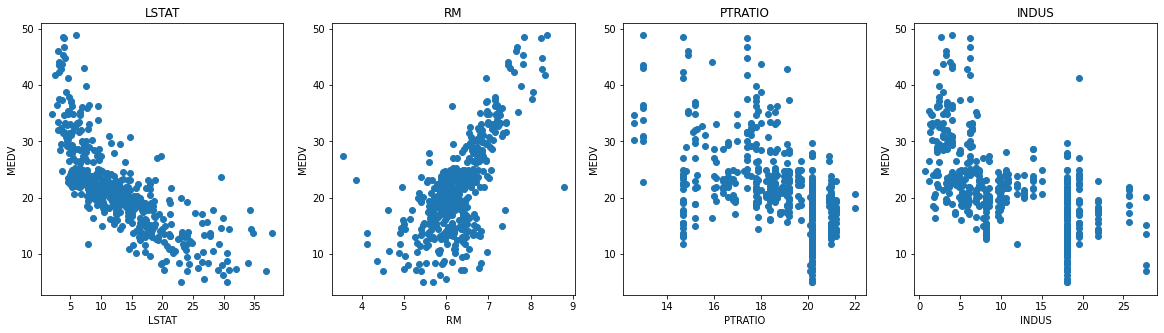

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM','PTRATIO','INDUS']
target = boston['House_price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [ ]:
boston.shape

(490, 14)

In [ ]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000
mean,3.643241,11.112245,11.113143,0.059184,0.554307,6.245471,68.27898,3.834519,9.514286,408.002041,18.520000,355.855449,12.92402,21.635918
std,8.722154,22.844626,6.821302,0.236209,0.116688,0.653147,28.16479,2.109948,8.691297,168.065190,2.110478,92.634273,7.08318,7.865301
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.90000,1.137000,1.000000,187.000000,12.600000,0.320000,1.98000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.881000,44.55000,2.111050,4.000000,280.250000,17.400000,375.912500,7.34750,16.700000
50%,0.247510,0.000000,9.690000,0.000000,0.538000,6.185000,76.80000,3.275900,5.000000,330.000000,19.100000,391.770000,11.67500,20.900000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.578000,93.87500,5.214600,24.000000,666.000000,20.200000,396.322500,17.11750,24.675000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000,48.800000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


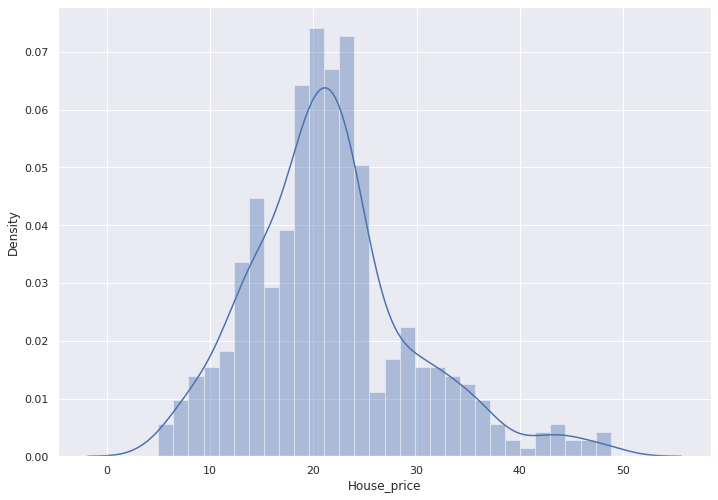

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['House_price'], bins=30)
plt.show()

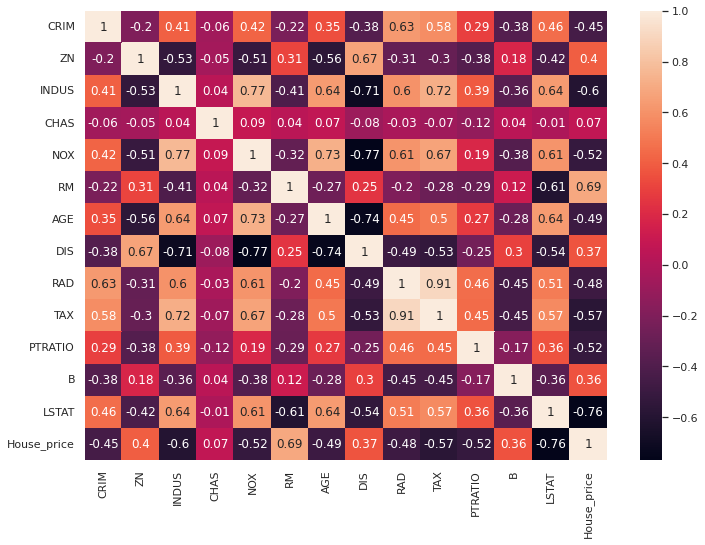

In [ ]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

# Train Test Split

In [ ]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'],boston['PTRATIO'],boston['INDUS']], columns = ['LSTAT','RM','PTRATIO','INDUS'])
Y = boston['House_price']
print(X)
print(Y)

     LSTAT     RM  PTRATIO  INDUS
0    18.72  6.142     21.0   8.14
1     3.11  7.610     14.7   2.03
2     8.01  6.037     20.2   5.19
3    14.65  6.376     20.2  18.10
4    11.74  5.708     19.6   7.38
..     ...    ...      ...    ...
485   7.79  7.333     13.0   3.97
486   5.29  8.780     20.2  18.10
487   6.78  6.273     18.7  12.83
488   9.71  6.951     17.4   6.20
489   9.81  6.101     14.7  19.58

[490 rows x 4 columns]
0      15.2
1      42.3
3      21.1
4      17.7
5      18.5
       ... 
500    36.0
501    21.9
502    24.1
504    26.7
505    25.0
Name: House_price, Length: 490, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(343, 4)
(147, 4)
(343,)
(147,)


# XGBoost

In [ ]:

# Import XGBoost Regressor
from xgboost import XGBRegressor
#Create a XGBoost Regressor
reg = XGBRegressor()


In [ ]:
from sklearn import model_selection
import math
scoring = 'neg_mean_squared_error'
kfold = model_selection.KFold(n_splits=10, random_state=42,shuffle=True)
cv = model_selection.cross_val_score(reg, X_train, y_train, cv=kfold, scoring=scoring)
sqrt_cv = [math.sqrt(abs(i)) for i in cv]

[17:31:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
print("Root Mean Square Error (RMSE) score\n")
print("{} ({})".format( np.mean(sqrt_cv), np.std(sqrt_cv)))
print('Result from each iteration of cross validation:', cv, '\n')

Root Mean Square Error (RMSE) score

3.261007154257733 (0.5662088776479557)
Result from each iteration of cross validation: [-10.0222512  -11.28509772  -9.25006208  -7.60667611 -15.02309941
  -6.4207765   -7.65530276 -15.85575677 -18.33439894  -8.09418004] 



In [ ]:
scoring = 'r2'
kfold = model_selection.KFold(n_splits=10, random_state=42,shuffle=True)
cv = model_selection.cross_val_score(reg, X_train, y_train, cv=kfold, scoring=scoring)

[17:31:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
print("R-squared Value\n")
print("{} ({})".format( cv.mean(), cv.std()))
print('Result from each iteration of cross validation:', cv, '\n')

R-squared Value

0.811996785308977 (0.06246671245918204)
Result from each iteration of cross validation: [0.83712054 0.79836353 0.7999499  0.76658685 0.80771487 0.87165262
 0.85530782 0.66828096 0.80388027 0.9111105 ] 



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
model = reg
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
rsquared_score = r2_score(y_test, y_pred)

[17:31:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RMSE score: 2.8995709994440446
R2 score: 0.8645162822641637

Scatter plot of y_test against y_pred:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


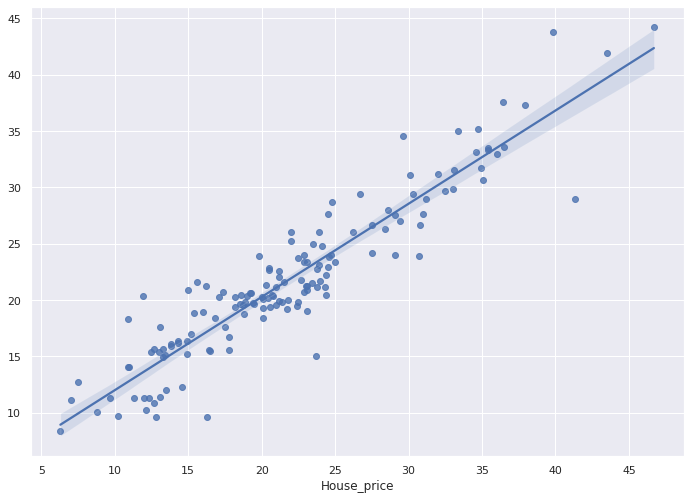

In [ ]:
print('RMSE score:', rmse_score)
print('R2 score:', rsquared_score)
print('\nScatter plot of y_test against y_pred:')
sns.regplot(y_test, y_pred);

In [ ]:
print(X_test)

     LSTAT     RM  PTRATIO  INDUS
452  12.92  6.019     19.2   9.69
84   19.37  6.405     20.2  18.10
434   5.68  6.563     17.8   2.46
473  11.50  5.705     18.4   9.90
428  13.35  5.983     20.1  27.74
..     ...    ...      ...    ...
5    23.60  5.536     20.2  18.10
116   6.29  6.315     16.6   4.05
45   11.98  6.674     21.0   8.14
16    7.43  6.162     14.7   2.03
453   6.87  6.376     19.6   7.38

[147 rows x 4 columns]


In [ ]:
import joblib   
# Save the model as a pickle in a file 
joblib.dump(reg, './Xgb.pkl') 
  


['C:/Users/samee/PycharmProjects/machine Learning/Xgb.pkl']